In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna modelo K-means

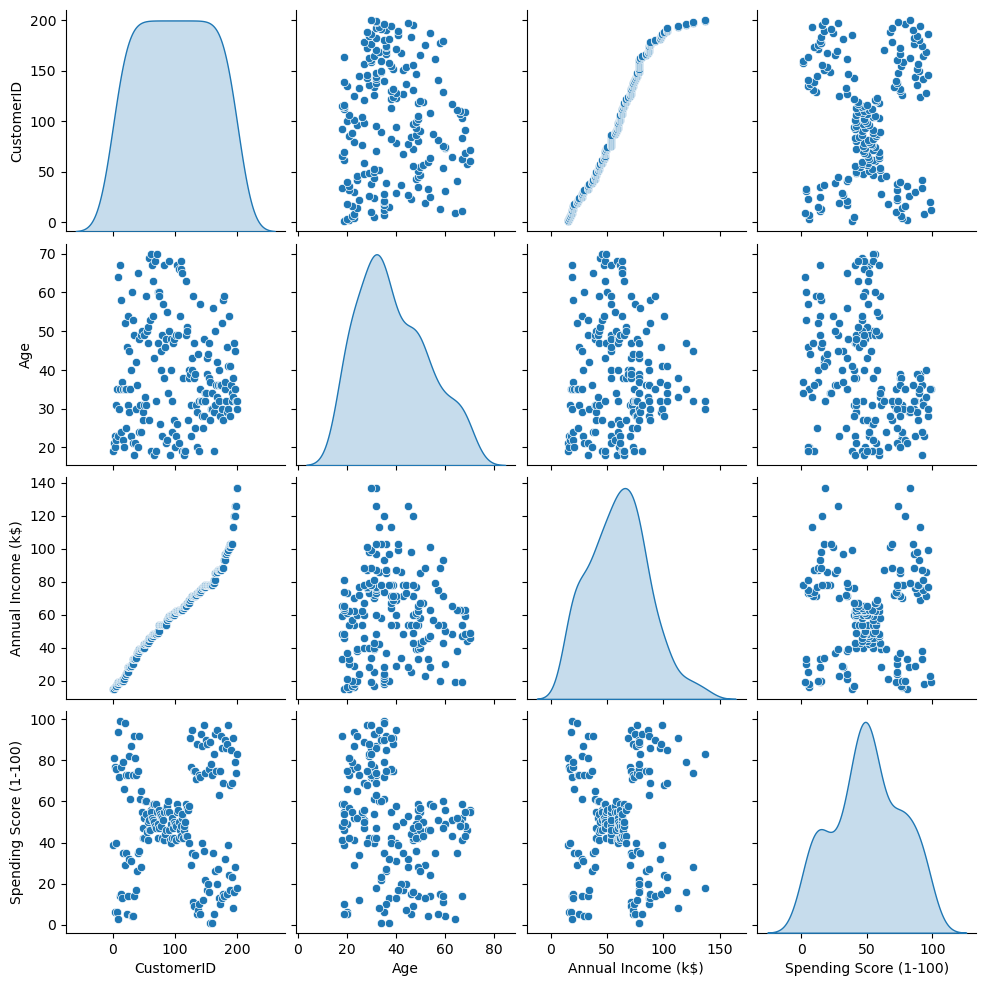

In [62]:
sns.pairplot(data, diag_kind='kde')

<Axes: >

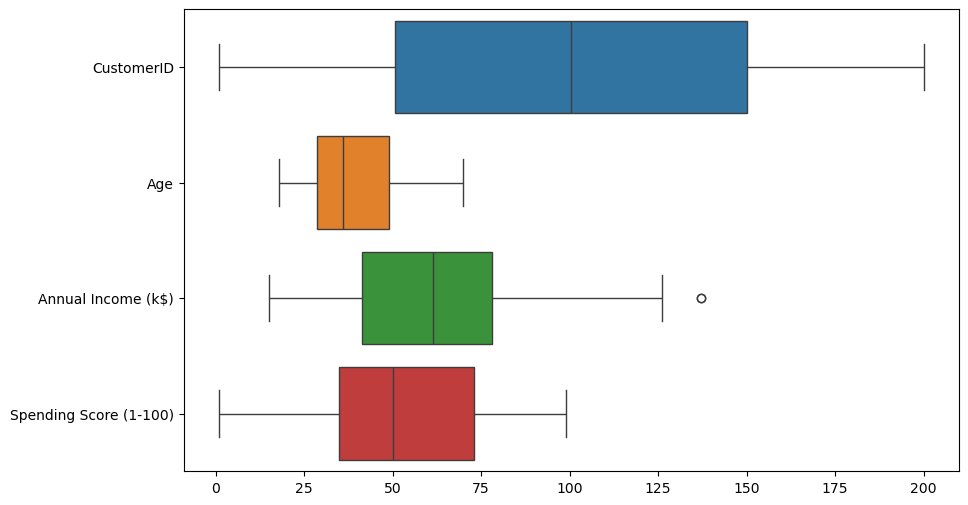

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')

In [64]:
data.isnull().sum()  # Verificar valores nulos
data = data.dropna() # Eliminar filas con valores nulos

In [65]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 2:])  # Asumiendo que las dos primeras columnas son irrelevantes

In [67]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Varianza acumulada')

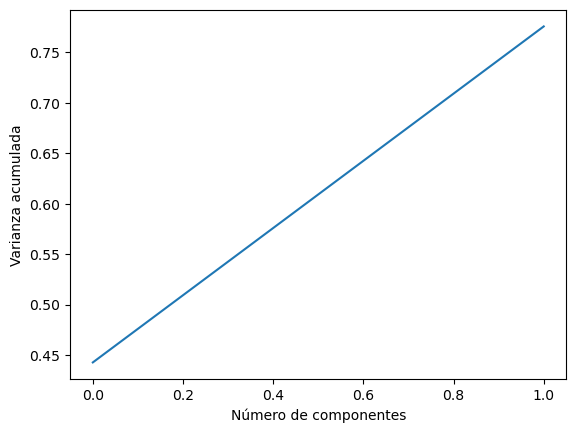

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')

Text(0.5, 1.0, 'Método del Codo')

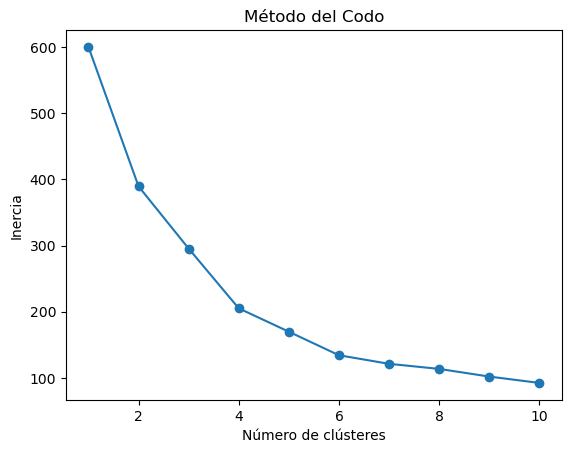

In [70]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')

In [74]:
optimal_k = 5  # Basado en el método del codo

In [76]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [2]:
#Entrenar el modelo configurando los diferentes hiperparámetros modelo clustering

Text(0, 0.5, 'Distancia Euclidiana')

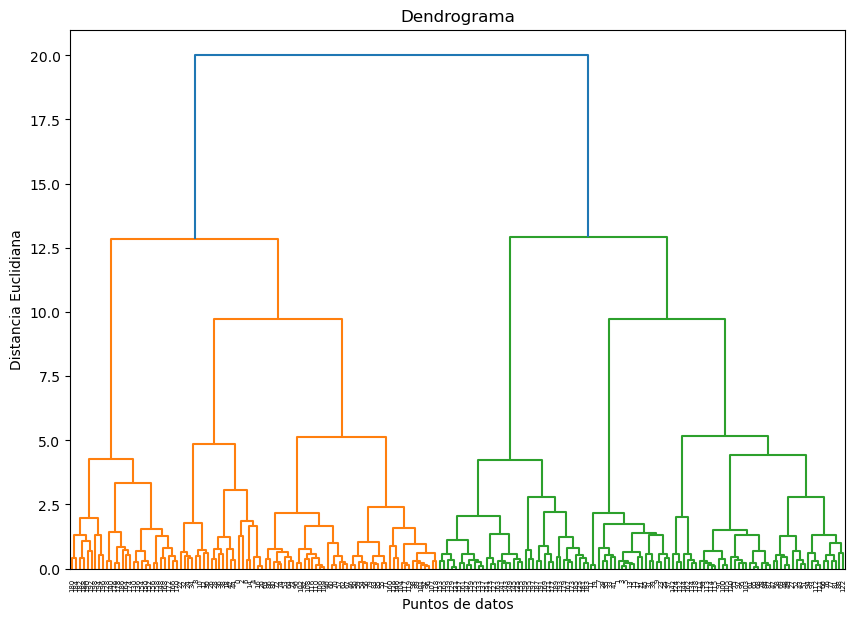

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')

In [86]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529


In [89]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("K-Means:")
print(f"Coeficiente de Silhouette: {silhouette_score(scaled_data, kmeans_labels):.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_score(scaled_data, kmeans_labels):.2f}")

K-Means:
Coeficiente de Silhouette: 0.41
Índice de Calinski-Harabasz: 123.42


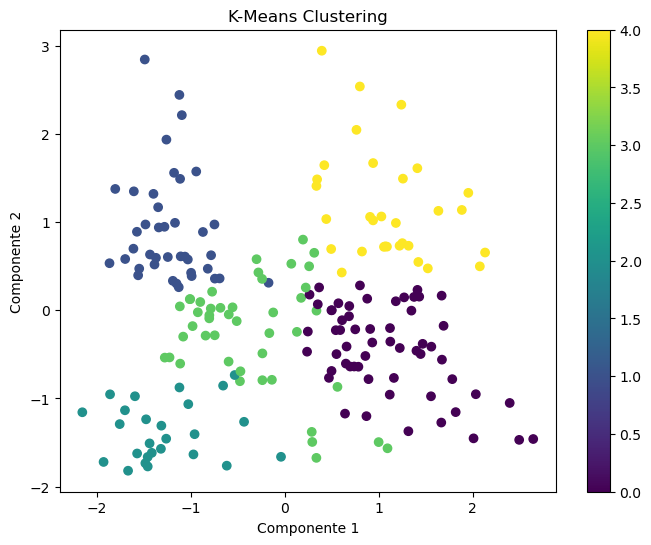

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()

Silhouette Score: 0.32148866683112387


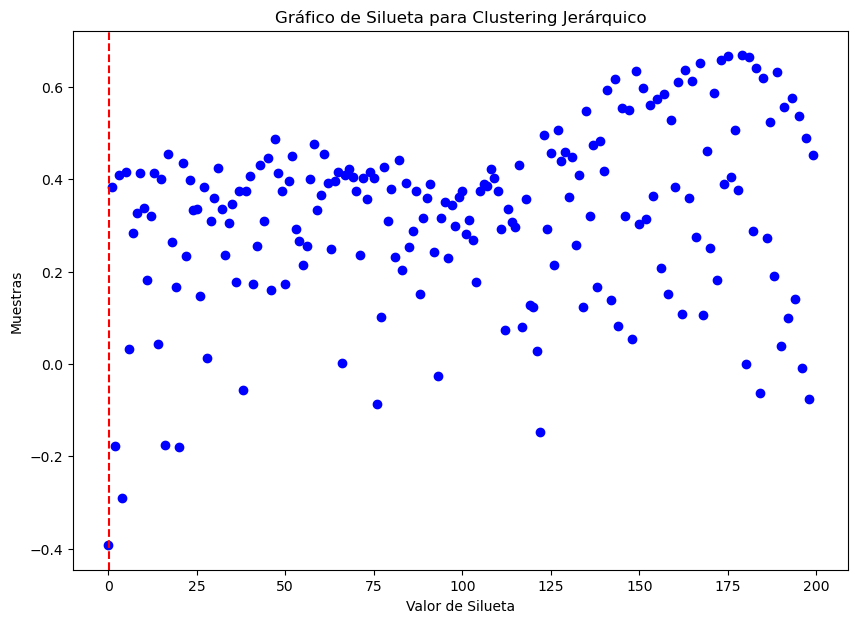

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

In [96]:
# 7.Interpretar, analizar y documentar los resultados obtenidos

# La edad del cliente puede influyé en sus ingresos anuales
# En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1,eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados.
# Un valor de 0.3214 de Coeficiente de Silhouette indica que los clusters no están tan bien separados ni son tan coherentes. Aunque los puntos dentro de cada cluster están algo agrupados, hay cierta superposición entre los clusters, lo que podría sugerir que los grupos podrían no ser perfectamente distintos.
# El Índice de Calinski-Harabasz: 88.1017 es bastante bajo, lo que sugiere que los clusters no son relativamente compactos y bien separados. En general, un valor superior a 500 generalmente indica que el modelo ha realizado una buena segmentación.